In [1]:
import numpy as np 
import PySO
import os

In [2]:
#Simple gaussian to optimize/sample 
class GaussianModel(PySO.Model):
    """
    A simple 2D Gaussian
    """
    
    names    = ['x', 'y'] 
    bounds   = [[-10,10], [-10,10]]
    periodic = [0, 0]

    def log_likelihood(self, param):
        return -0.5 * ((param['x']-2.5)**2 + (param['y']+1.9)**2) - 0.5 * np.log(2*np.pi)


In [3]:

mymodel = GaussianModel()

NumParticles = 100

outdir = 'results/'

myswarm = PySO.Swarm(mymodel,
                     NumParticles,
                     Output = outdir,
                     Verbose = True,
                     Nperiodiccheckpoint = 1, # Final two args mean evolution is saved at every iteration. Only necessary if running myswarm.Plot()
                     Saveevolution = True,    ############
                     Omega = 0, Phip = 0, Phig = 0, Mh_fraction = 1.0, Maxiter=1000)

# Clear any existing history file
history_file = os.path.join(outdir, "SwarmEvolutionHistory.dat")
if os.path.isfile(history_file): os.system('rm {}'.format(history_file))

myswarm.Run()

myswarm.PlotSwarmEvolution()


Iteration: 1, Max Value: -1.0562388061045291 at [ 2.98390233 -1.6989053 ], Spread: 120.1054978340375
Iteration: 2, Max Value: -1.0562388061045291 at [ 2.98390233 -1.6989053 ], Spread: 115.96320856110479
Iteration: 3, Max Value: -1.0562388061045291 at [ 2.98390233 -1.6989053 ], Spread: 116.45164903635288
Iteration: 4, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 108.23365669306953
Iteration: 5, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 101.92384520448142
Iteration: 6, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 92.56137248794373
Iteration: 7, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 88.2025449795605
Iteration: 8, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 88.2025449795605
Iteration: 9, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 82.69125309772126
Iteration: 10, Max Value: -0.9431671573834437 at [ 2.70764968 -1.97306749], Spread: 75.71

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd 
pd = pd.read_csv('results/SwarmEvolutionHistory.dat')
pd

,# particle_number,x,y,function_value
0,0,-2.467579,7.620863,-58.580778
1,1,0.303537,-9.264391,-30.448292
2,2,-4.390586,9.868457,-93.907311
3,3,2.983902,-1.698905,-1.056239
4,4,9.371111,-2.391988,-24.646046
...,...,...,...,...
100095,95,0.980700,-2.732994,-2.420015
100096,96,2.112229,-2.914611,-1.508840
100097,97,4.270675,-1.347718,-2.639091
100098,98,3.211277,-1.878568,-1.172126


In [5]:
posterior = np.array([pd[' x'].to_numpy(),pd[' y'].to_numpy()]).T
posterior.shape

(100100, 2)

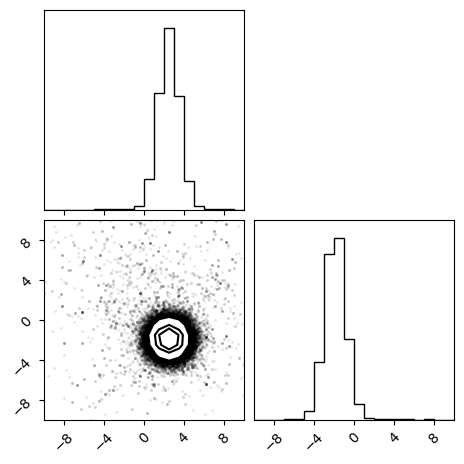

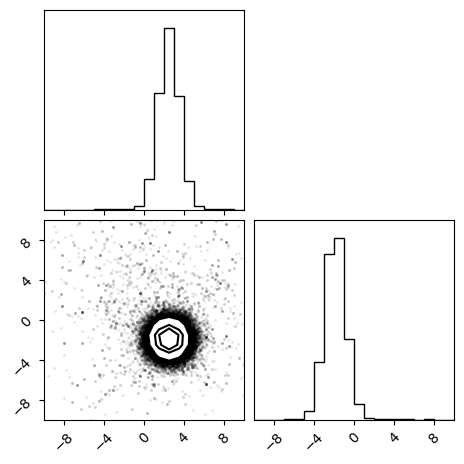

In [7]:
import corner
corner.corner(posterior,plot_density=False)